<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


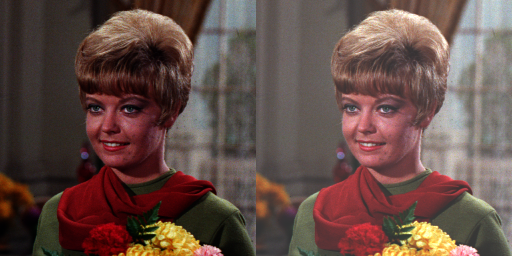

In [8]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Week2/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

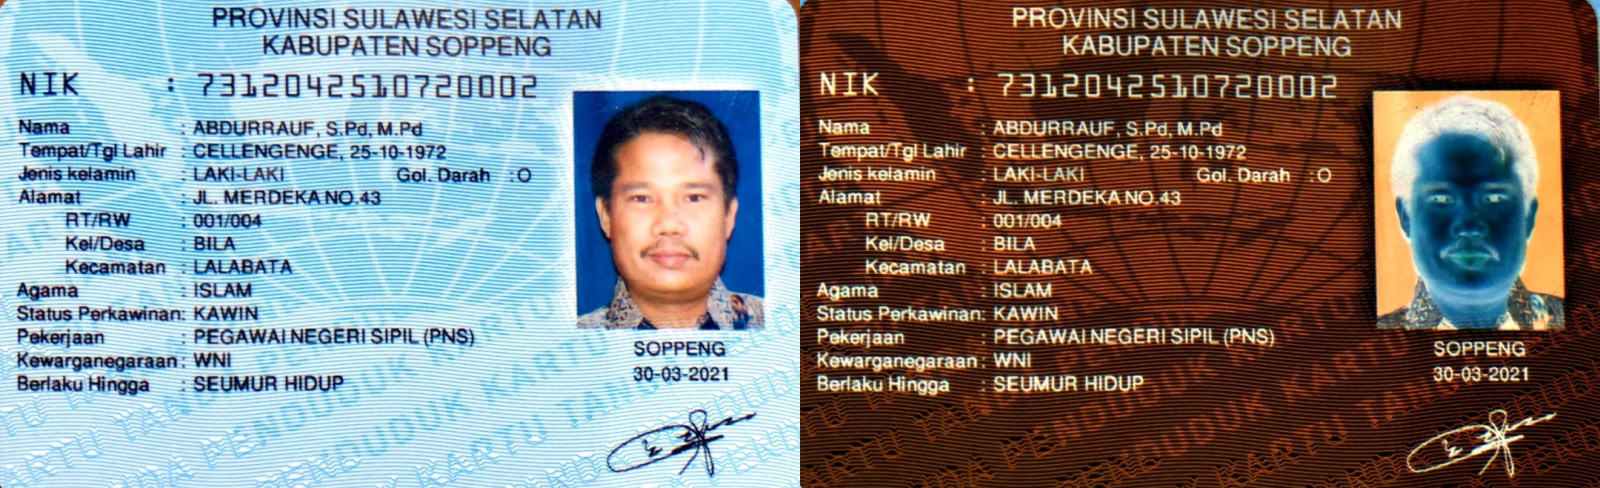

In [20]:
# 1. Inverse Citra

original = cv.imread('/content/KTP.jpg')
inverse_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y, x, c] = 255 - original[y, x, c]

final_frame = cv.hconcat([original, inverse_image])
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


<ipython-input-38-6cb42ea1f515>:17: RuntimeWarning: overflow encountered in scalar multiply
  contrast = contrast * (original[y, x, c] - 128) + 128 + brightness
<ipython-input-38-6cb42ea1f515>:17: RuntimeWarning: invalid value encountered in scalar multiply
  contrast = contrast * (original[y, x, c] - 128) + 128 + brightness
<ipython-input-38-6cb42ea1f515>:18: RuntimeWarning: invalid value encountered in cast
  brightness_contrast_image[y, x, c] = np.clip(contrast, 0, 255)


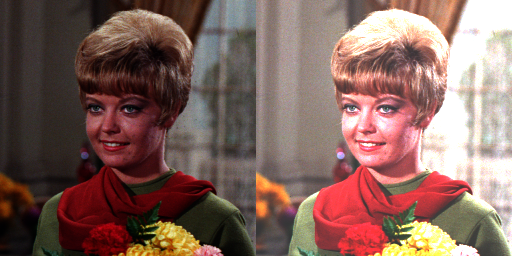

In [38]:
# 2. Transformasi Contrast

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Week2/Images/female.tiff')
brightness_contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast = contrast * (original[y, x, c] - 128) + 128 + brightness
      brightness_contrast_image[y, x, c] = np.clip(contrast, 0, 255)

final_frame = cv.hconcat([original, image])
cv2_imshow(final_frame)

In [ ]:
# 3. Transformasi Logarithmic Brightness

